## Structure

#### Parametric Methods
* Linear Regression
* Bayesian Linear Regression

#### Nonparametric Methods
* Interpolation
* Gaussian Processes

#### Bonus
* From BLR to GPs

In [901]:
import LinearRegression as LR
import BayesianLinearRegression as BLR
import Interpolation as interp
import GaussianProcessRegression as GP

In [902]:
import imp

## Non Parametric Models
* Models which the number of parameters are fixed (complexity is fixed)
    * Linear Regresson
    * Bayesian Linear Regression

In [903]:
import numpy as np


## Linear Regression
-Build a model with a set number of parameters, i.e. parametric

$f(x) = \pmb{w}^T\pmb{x}$

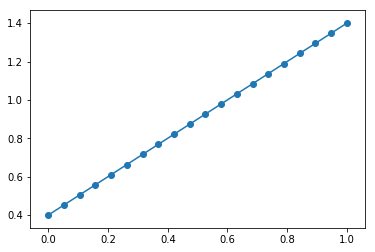

In [904]:
import class_demos
imp.reload(class_demos)
imp.reload(LR)
f1=class_demos.linearmodel()
xtrain=np.linspace(0,1,20)
LRmodel=LR.regress()
LRmodel.polybasis(1)

## Clean Data
LRmodel.traindata(xtrain,f1(xtrain))
LRmodel.trainmodel()
LRmodel.model
LRmodel.plot()

In [905]:
np.sum((LRmodel.eval(xtrain)-f1(xtrain))**2)/len(xtrain)

2.2125083201120565e-31

In [985]:
## Noisy Data
f2=class_demos.noisylinearmodel(alpha=0.3)
xtrain=xtrain
ytrain=f2(xtrain)

In [986]:
LRmodeln=LR.regress()
LRmodeln.polybasis(1)
LRmodeln.traindata(xtrain,ytrain)
LRmodeln.trainmodel()
LRmodeln.model


array([[ 0.53782878],
       [ 0.59746902]])

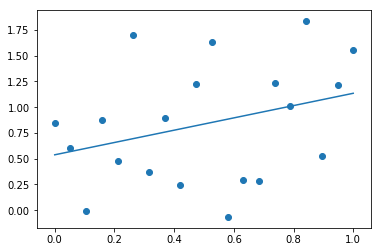

In [987]:
LRmodeln.plot()

In [909]:
np.sum((LRmodel.eval(xtrain)-f2(xtrain))**2)/len(xtrain)

0.32233451993866241

## Bayesian Linear Regression
-Data is noisy and is characterized by a distribution

$y = f(x) + \epsilon$

$f(x)=\pmb{w}^T\pmb{x}$

-The realizations from the model are i.i.d.
    Independent and Identically Distributed, like flipping a coin!

$\epsilon_i \sim N(0,\beta^{-1})$
    
-This naturally gives rise to the likelihood of the  given training data, with a "known" analytical model

$p(\pmb{y}|\pmb{X},\pmb{w},\beta)$

-By introducing a prior over the weights of the analytical model we can apply bayes theorem than cast the problem as obtaining the posterior distribution of the model weights given the data, and the distributions for the respective likelihood and prior

$\pmb{Posterior}= \frac{\pmb{Likelihood} * \pmb{Prior}}
{\pmb{Marginal Distribution}}$

Prior:
$p(\pmb{w}|\alpha) \sim N(0,\alpha^{-1}\pmb{I})$

Posterior:
$p(\pmb{w}|\pmb{y},\pmb{X},\beta,\alpha)= \frac{p(\pmb{y}|\pmb{X},\pmb{w},\beta)p(\pmb{w}|\alpha)}
{p(\pmb{y}|\alpha,\beta)}$

Marginal Distribution:
$p(\pmb{y}|\alpha,\beta) = \int p(\pmb{y}|\pmb{X},\pmb{w},\beta)p(\pmb{w}|\alpha) d\pmb{w}$
 

In [988]:
## Fitting with BLR
imp.reload(BLR)
BLmodel=BLR.bayesregress()
BLmodel.polybasis(1)
BLmodel.traindata(xtrain,ytrain)
BLmodel.sethyper(alpha=1,beta=4)
BLmodel.trainmodel()
BLmodel.model

array([[ 0.55021182],
       [ 0.55894764]])

#### Empirical Bayes Estimate
* Notice we introduce two parameters into the mix, $\alpha$ which describes the distribution of the prior, and $\beta$ which describes the distribution of the likelihood
* By marginalizing over the weights in the posterior distribution we can obtain the marginal distribution of the data given the hyper parameters
* This marginal distribution is than used to in conjunction with bayes theorem observing the likelihood of the parameters given the data
* Ultimate the goal becomes maximizing the likelihood of the data given the parameters (given by the marginalization of the posterior over the weights). 
* Analytical forms can be found, and the parameters can than be estimated

In [993]:
BLmodel.optimize()
BLmodel.model

array([[ 0.56428536],
       [ 0.49320979]])

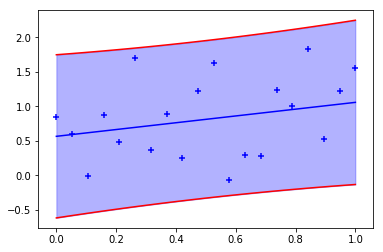

In [994]:
fhat,var=BLmodel.eval(BLmodel.xtrain)
BLmodel.plot()

In [996]:
print(BLmodel.alpha)
print(BLmodel.beta)

[[ 2.91583135]]
3.20445388577


#### Connections
-BLR can also be thought of as a form of regularization, (L1 L2 regulatization for e.g.) which conditions the model weights based off of the choosing of the $\alpha$ and $\beta$ hyperparameters, we can see this when we raise the polynomial degree and try to fit higher order models to the noisy linear model

## Non parametric models
* Models which the number of parameters grow as the amount of data increases (complexity grows)    
    * Interpolation
    * Gaussian Processes

## Interpolation
* Extension of generalized least squares regression requiring that the fitted line passes through the data point
* e.g. Lagrange Polynomials; formulated by solving coefficients from general least squares using set of equations equating to training points, therefore need n+1 points to fit a n-th degree polynomial

$f(x)= \sum_{i=0}^{n} y_ic_{i}$

$c_{i}= {\displaystyle \prod_{0\leq j \leq n, i \neq j}} \frac{x-x_i}{xi-xj}$

In [1380]:
import class_demos
imp.reload(interp)
n=6
xtrain=np.linspace(0,1,n)
f=class_demos.testfuncinterp()
ytrain=f(xtrain)

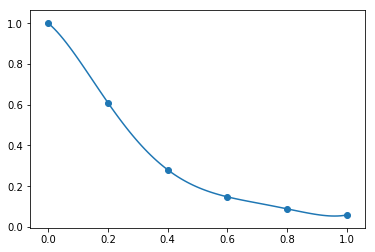

In [1381]:
INTmodel=interp.interp()
INTmodel.traindata(xtrain,ytrain)
INTmodel.polybasis()
INTmodel.interp()
INTmodel.plot()

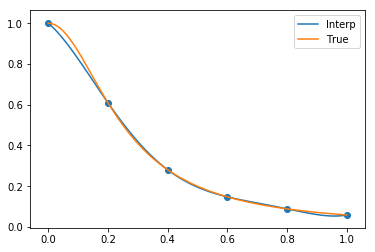

In [1382]:
INTmodel.ftrue=f
INTmodel.plottrue()

### Comparison To other methods
* If we use a radial basis function centered about every single data point as our basis functions for interpolation, we have a natural extension to think of the GP framework
* An example of kernel regression using radial basis functions is below, however without the statistical framework there is no obvious way in optimize hyperparameters

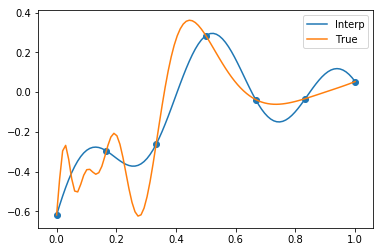

In [1851]:
import class_demos
imp.reload(interp)
INTmodel=interp.interp()
INTmodel.traindata(xtrain,ytrain)
INTmodel.rbfbasis(l=0.1)
#INTmodel.polybasis()
INTmodel.interp()
INTmodel.ftrue=f
INTmodel.plottrue()

## Gaussian Processes
* Non parametric model based on a covariance function (1D)
* GPs provides us a tool for nonlinear interpolation which gives us confidence bounds 
* GPs also give us an expression in which we shift our focus to the optimization of hyperparameters

$\hat{f} (x)=\mu + k(x,x_i){K_{ij}}^{-1}(y_j-\mu)$

$k(x,x_i)=exp\frac{(x-x_i)^2}{l}$

$K_{ij}=k(x_i,x_j)=exp\frac{(x_i-x_j)^2}{l}$

$i$,$j$ enumerate the available training data

In [1852]:
import class_demos
imp.reload(GP)
n=7
xtrain=np.linspace(0,1,n)
f=class_demos.testfuncgp()
ytrain=f(xtrain)

In [1853]:
GPmodel=GP.gpprocess()
GPmodel.traindata(xtrain,ytrain)
GPmodel.rbfbasis(l=0.3) #set length scale parameter
GPmodel.mu=0
GPmodel.trainGP()

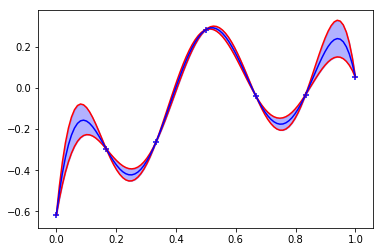

In [1854]:
# Plot the interpolation due to GP
GPmodel.plot()

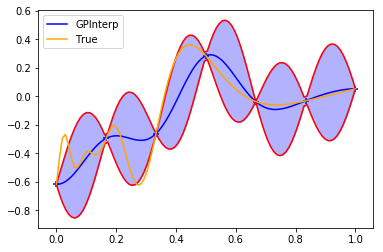

In [1857]:
# Plot true function values versus predictions from GP
GPmodel.ftrue=f
GPmodel.plottrue()

### Hyperparameter optimization
* By casting the problem stochasically, a process followed similar from BLR allows us an expression of the liklihood of the hyperparameters for the given data. This is the function we want to maximize

Optimization terminated successfully.
         Current function value: -17.568312
         Iterations: 17
         Function evaluations: 34
Updating Hyperparameters
Training GP


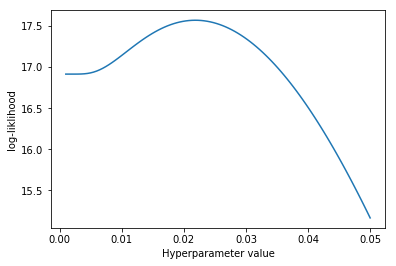

Optimal Solution for hyperparameter l is 0.0219


In [1856]:
# Maximize the logliklihood with respect the hyperparameter,l
GPmodel.optimize()
print('Optimal Solution for hyperparameter l is %.4f' % GPmodel.l)

In [1858]:
GPmodel.l #check for update

0.02185546874999923